In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_train = pd.read_csv('z_train.csv')
df_test = pd.read_csv('z_test.csv')

In [3]:
train = df_train.copy()
test = df_test.copy()

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             15326 non-null  int64  
 1   city                    15326 non-null  object 
 2   city_development_index  15326 non-null  float64
 3   gender                  11725 non-null  object 
 4   relevent_experience     15326 non-null  object 
 5   enrolled_university     15024 non-null  object 
 6   education_level         14957 non-null  object 
 7   major_discipline        13089 non-null  object 
 8   experience              15276 non-null  object 
 9   company_size            10592 non-null  object 
 10  company_type            10435 non-null  object 
 11  last_new_job            14987 non-null  object 
 12  training_hours          15326 non-null  int64  
 13  target                  15326 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
df_test.shape

(3832, 13)

In [6]:
train.shape

(15326, 14)

In [7]:
train.isnull().sum()[train.isnull().sum() > 0].sort_values()

experience               50
enrolled_university     302
last_new_job            339
education_level         369
major_discipline       2237
gender                 3601
company_size           4734
company_type           4891
dtype: int64

In [8]:
train.company_type.value_counts()

Pvt Ltd                7873
Funded Startup          792
Public Sector           773
Early Stage Startup     489
NGO                     421
Other                    87
Name: company_type, dtype: int64

In [9]:
train.gender.value_counts()

Male      10577
Female      998
Other       150
Name: gender, dtype: int64

In [10]:
train.major_discipline.value_counts()

STEM               11609
Humanities           530
Other                308
Business Degree      259
Arts                 204
No Major             179
Name: major_discipline, dtype: int64

In [11]:
train.education_level.value_counts()

Graduate          9265
Masters           3514
High School       1607
Phd                329
Primary School     242
Name: education_level, dtype: int64

In [12]:
def ed_level(num):
    num= str(num)
    #print(type(num))
    if 'nan' in num:
        num = num.replace('nan','Graduate')
        #num = float(num)
        return num
    
    else:
        #num = float(num)
        return num

In [13]:
train.education_level = train.education_level.apply(ed_level)

In [14]:
test.education_level = test.education_level.apply(ed_level)

In [15]:
train.last_new_job.value_counts()

1        6458
>4       2627
2        2318
never    1945
4         823
3         816
Name: last_new_job, dtype: int64

In [16]:
train.enrolled_university.value_counts()

no_enrollment       11071
Full time course     2990
Part time course      963
Name: enrolled_university, dtype: int64

In [17]:
train.experience.value_counts()

>20    2633
5      1148
4      1104
3      1084
6       971
2       905
7       835
10      793
9       780
8       643
15      553
11      538
14      479
1       440
16      420
<1      408
12      384
13      304
17      281
19      235
18      225
20      113
Name: experience, dtype: int64

<AxesSubplot:>

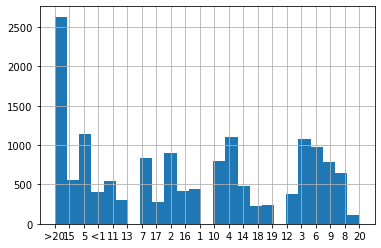

In [18]:
train.experience.hist(bins=25)

In [19]:
train.city.value_counts()

city_103    3497
city_21     2156
city_16     1259
city_114    1067
city_160     670
            ... 
city_129       2
city_8         2
city_140       1
city_171       1
city_121       1
Name: city, Length: 123, dtype: int64

In [20]:
train.city_development_index.value_counts()

0.920    4167
0.624    2156
0.910    1259
0.926    1067
0.698     536
         ... 
0.824       3
0.780       3
0.625       2
0.664       1
0.781       1
Name: city_development_index, Length: 93, dtype: int64

In [21]:
train.relevent_experience.value_counts()

Has relevent experience    11068
No relevent experience      4258
Name: relevent_experience, dtype: int64

In [22]:
train.drop(['enrollee_id', 'city','company_size', 'company_type', 'major_discipline', 'last_new_job'], axis=1 , inplace = True)

In [23]:
test.drop(['enrollee_id', 'city','company_size', 'company_type', 'major_discipline', 'last_new_job'], axis=1 , inplace = True)

In [24]:
train.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,>20,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,15,47,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,5,83,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,<1,52,1.0
4,0.764,NaN,Has relevent experience,Part time course,Graduate,11,24,1.0


In [25]:
train.shape

(15326, 8)

In [26]:
def genero(num):
    num= str(num)
    #print(type(num))
    if 'nan' in num:
        num = num.replace('nan','Male')
        #num = float(num)
        return num
    
    else:
        #num = float(num)
        return num

In [27]:
train.gender = train.gender.apply(genero)
test.gender = test.gender.apply(genero)

In [28]:
train.gender.value_counts()

Male      14178
Female      998
Other       150
Name: gender, dtype: int64

In [29]:
train.shape

(15326, 8)

In [30]:
train.shape

(15326, 8)

In [31]:
train.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,>20,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,15,47,0.0
2,0.624,Male,No relevent experience,Full time course,Graduate,5,83,0.0
3,0.789,Male,No relevent experience,NaN,Graduate,<1,52,1.0
4,0.764,Male,Has relevent experience,Part time course,Graduate,11,24,1.0


In [32]:
def limpieza_exp(num):
    num= str(num)
    #print(type(num))
    if '>20' in num:
        num = num.replace('>20','20')
        #num = float(num)
        return num 
    if '<1' in num:
        num = num.replace('<1','1')
        #num = float(num)
        return num
    if 'nan' in num:
        num = num.replace('nan','0')
        #num = float(num)
        return num
    else:
        #num = float(num)
        return num


In [33]:
train.experience = train.experience.apply(limpieza_exp)

In [34]:
test.experience = test.experience.apply(limpieza_exp)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  15326 non-null  float64
 1   gender                  15326 non-null  object 
 2   relevent_experience     15326 non-null  object 
 3   enrolled_university     15024 non-null  object 
 4   education_level         15326 non-null  object 
 5   experience              15326 non-null  object 
 6   training_hours          15326 non-null  int64  
 7   target                  15326 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 958.0+ KB


In [36]:
train.experience.value_counts()

20    2746
5     1148
4     1104
3     1084
6      971
2      905
1      848
7      835
10     793
9      780
8      643
15     553
11     538
14     479
16     420
12     384
13     304
17     281
19     235
18     225
0       50
Name: experience, dtype: int64

In [37]:
def expert(num):
    num= str(num)
    #print(type(num))
    if '10' in num:
        num = num.replace('10','expert')
        #num = float(num)
        return num
    
    if '11' in num:
        num = num.replace('11','expert')
        #num = float(num)
        return num
    
    if '12' in num:
        num = num.replace('12','expert')
        #num = float(num)
        return num
    
    if '13' in num:
        num = num.replace('13','expert')
        #num = float(num)
        return num
    
    if '14' in num:
        num = num.replace('14','expert')
        #num = float(num)
        return num
    if '15' in num:
        num = num.replace('15','expert')
        #num = float(num)
        return num
    if '16' in num:
        num = num.replace('16','expert')
        #num = float(num)
        return num
    if '17' in num:
        num = num.replace('17','expert')
        #num = float(num)
        return num
    if '18' in num:
        num = num.replace('18','expert')
        #num = float(num)
        return num
    if '19' in num:
        num = num.replace('19','expert')
        #num = float(num)
        return num
    if '20' in num:
        num = num.replace('20','expert')
        #num = float(num)
        return num
    else:
        #num = float(num)
        return num

In [38]:
train.experience = train.experience.apply(expert)

In [39]:
test.experience = test.experience.apply(expert)

In [40]:
train.experience.value_counts()

expert    6958
5         1148
4         1104
3         1084
6          971
2          905
1          848
7          835
9          780
8          643
0           50
Name: experience, dtype: int64

In [41]:
def experiencia_nivel(num):
    num= str(num)
    #print(type(num))
    if '0' in num:
        num = num.replace('0','junior')
        #num = float(num)
        return num
    
    if '1' in num:
        num = num.replace('1','junior')
        #num = float(num)
        return num
    
    if '2' in num:
        num = num.replace('2','junior')
        #num = float(num)
        return num
    
    if '3' in num:
        num = num.replace('3','intermediate')
        #num = float(num)
        return num
    
    if '4' in num:
        num = num.replace('4','intermediate')
        #num = float(num)
        return num
    if '5' in num:
        num = num.replace('5','intermediate')
        #num = float(num)
        return num
    if '6' in num:
        num = num.replace('6','advanced')
        #num = float(num)
        return num
    if '7' in num:
        num = num.replace('7','advanced')
        #num = float(num)
        return num
    if '8' in num:
        num = num.replace('8','advanced')
        #num = float(num)
        return num
    if '9' in num:
        num = num.replace('9','advanced')
        #num = float(num)
        return num
    else:
        #num = float(num)
        return num

In [42]:
train.experience = train.experience.apply(experiencia_nivel)

In [43]:
test.experience = test.experience.apply(experiencia_nivel)

In [44]:
train.experience.value_counts()

expert          6958
intermediate    3336
advanced        3229
junior          1803
Name: experience, dtype: int64

In [45]:
train.enrolled_university.value_counts()

no_enrollment       11071
Full time course     2990
Part time course      963
Name: enrolled_university, dtype: int64

In [46]:
def limpieza_enroll(num):
    num= str(num)
    #print(type(num))
    if 'nan' in num:
        num = num.replace('nan','no_enrollment')
        #num = float(num)
        return num
    else:
        #num = float(num)
        return num

In [47]:
train.enrolled_university = train.enrolled_university.apply(limpieza_enroll)

In [48]:
test.enrolled_university = test.enrolled_university.apply(limpieza_enroll)

In [49]:
train.enrolled_university.value_counts()

no_enrollment       11373
Full time course     2990
Part time course      963
Name: enrolled_university, dtype: int64

In [50]:
!pip install feature-engine

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from feature_engine import imputation as imp
from feature_engine import encoding as enc
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.encoding import OneHotEncoder
from feature_engine import imputation as mdi


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from feature_engine.wrappers import SklearnTransformerWrapper


from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import sklearn.metrics

In [52]:
train.columns

Index(['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'experience',
       'training_hours', 'target'],
      dtype='object')

In [53]:
train.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,expert,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,expert,47,0.0
2,0.624,Male,No relevent experience,Full time course,Graduate,intermediate,83,0.0
3,0.789,Male,No relevent experience,no_enrollment,Graduate,junior,52,1.0
4,0.764,Male,Has relevent experience,Part time course,Graduate,expert,24,1.0


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  15326 non-null  float64
 1   gender                  15326 non-null  object 
 2   relevent_experience     15326 non-null  object 
 3   enrolled_university     15326 non-null  object 
 4   education_level         15326 non-null  object 
 5   experience              15326 non-null  object 
 6   training_hours          15326 non-null  int64  
 7   target                  15326 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 958.0+ KB


In [55]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns = ['target']), train.target, test_size = 0.3, random_state = 7)

In [56]:
pipeline_competencia = Pipeline([('escalar', SklearnTransformerWrapper(StandardScaler(), variables=['training_hours'])),
                                   ('one_hot', enc.OneHotEncoder(variables = ['relevent_experience', 'experience','enrolled_university', 'education_level','gender'])),
                                   #('modelo', LogisticRegression())
                                   ], verbose = True)
pipeline_competencia.fit(X_train, y_train)

[Pipeline] ........... (step 1 of 2) Processing escalar, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing one_hot, total=   0.0s


Pipeline(steps=[('escalar',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['training_hours'])),
                ('one_hot',
                 OneHotEncoder(variables=['relevent_experience', 'experience',
                                          'enrolled_university',
                                          'education_level', 'gender']))],
         verbose=True)

In [57]:
data=pipeline_competencia.transform(X_train)
data.shape

(10728, 19)

In [58]:
data_test=pipeline_competencia.transform(test)
data_test.shape

(3832, 19)

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [60]:
X_train

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,training_hours
1421,0.848,Male,Has relevent experience,Full time course,Graduate,expert,34
5453,0.896,Male,No relevent experience,no_enrollment,Graduate,expert,5
196,0.920,Male,Has relevent experience,no_enrollment,Graduate,expert,74
3622,0.910,Male,Has relevent experience,no_enrollment,Graduate,expert,24
1498,0.579,Male,Has relevent experience,no_enrollment,Graduate,expert,24
...,...,...,...,...,...,...,...
5699,0.647,Male,No relevent experience,Full time course,Graduate,expert,23
10742,0.924,Male,Has relevent experience,no_enrollment,Masters,expert,80
537,0.920,Male,Has relevent experience,no_enrollment,Primary School,expert,70
9412,0.624,Male,Has relevent experience,no_enrollment,Graduate,intermediate,14


In [61]:
data

,city_development_index,training_hours,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,experience_expert,experience_intermediate,experience_junior,experience_advanced,enrolled_university_Full time course,enrolled_university_no_enrollment,enrolled_university_Part time course,education_level_Graduate,education_level_Primary School,education_level_Masters,education_level_Phd,education_level_High School,gender_Male,gender_Female,gender_Other
1421,0.848,-0.527002,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
5453,0.896,-1.012235,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
196,0.920,0.142284,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
3622,0.910,-0.694324,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1498,0.579,-0.694324,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,0.647,-0.711056,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
10742,0.924,0.242677,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
537,0.920,0.075356,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
9412,0.624,-0.861645,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0


In [62]:
dec_tree = DecisionTreeClassifier()
params = {'splitter':['random', 'best'], 'max_depth' : [3,6,10], 'random_state':[301]}
cvtree = GridSearchCV(dec_tree, params).fit(data, y_train)

In [63]:
cvtree.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=301, splitter='random')

In [64]:
tree_classifier_full = DecisionTreeClassifier( max_depth = 11, random_state=301).fit(data, y_train)

In [65]:
tree_classifier_full.feature_importances_

array([5.56909888e-01, 2.32268926e-01, 2.85720828e-02, 4.98169353e-03,
       8.84931621e-03, 1.54222242e-02, 1.77489598e-02, 1.44112892e-02,
       4.50742753e-02, 5.70361296e-03, 7.56991959e-03, 2.23198471e-02,
       6.06356644e-03, 1.22159478e-02, 3.42212429e-04, 5.64529168e-03,
       3.12356704e-03, 9.88401097e-03, 2.89336912e-03])

In [66]:
tree_classifier_full.feature_names_in_

array(['city_development_index', 'training_hours',
       'relevent_experience_Has relevent experience',
       'relevent_experience_No relevent experience', 'experience_expert',
       'experience_intermediate', 'experience_junior',
       'experience_advanced', 'enrolled_university_Full time course',
       'enrolled_university_no_enrollment',
       'enrolled_university_Part time course', 'education_level_Graduate',
       'education_level_Primary School', 'education_level_Masters',
       'education_level_Phd', 'education_level_High School',
       'gender_Male', 'gender_Female', 'gender_Other'], dtype=object)

In [67]:
pd.DataFrame([tree_classifier_full.feature_importances_], columns = tree_classifier_full.feature_names_in_).T

,0
city_development_index,0.556910
training_hours,0.232269
relevent_experience_Has relevent experience,0.028572
relevent_experience_No relevent experience,0.004982
experience_expert,0.008849
experience_intermediate,0.015422
experience_junior,0.017749
experience_advanced,0.014411
enrolled_university_Full time course,0.045074
enrolled_university_no_enrollment,0.005704


In [68]:
y_pred = tree_classifier_full.predict(data)

In [69]:
y_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [70]:
from sklearn.metrics import roc_auc_score

In [71]:
sklearn.metrics.roc_auc_score(y_train, y_pred)

0.7197525771595441

In [72]:
d_test = pipeline_competencia.transform(X_test)

In [73]:
pred_y_test = tree_classifier_full.predict(d_test)

In [74]:
sklearn.metrics.roc_auc_score(y_test, pred_y_test)

0.6532874524093865

In [75]:
pred_y_test

array([0., 0., 0., ..., 0., 0., 0.])

In [76]:
pred_y_test[-1]

0.0

In [77]:
X_train

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,training_hours
1421,0.848,Male,Has relevent experience,Full time course,Graduate,expert,34
5453,0.896,Male,No relevent experience,no_enrollment,Graduate,expert,5
196,0.920,Male,Has relevent experience,no_enrollment,Graduate,expert,74
3622,0.910,Male,Has relevent experience,no_enrollment,Graduate,expert,24
1498,0.579,Male,Has relevent experience,no_enrollment,Graduate,expert,24
...,...,...,...,...,...,...,...
5699,0.647,Male,No relevent experience,Full time course,Graduate,expert,23
10742,0.924,Male,Has relevent experience,no_enrollment,Masters,expert,80
537,0.920,Male,Has relevent experience,no_enrollment,Primary School,expert,70
9412,0.624,Male,Has relevent experience,no_enrollment,Graduate,intermediate,14


In [78]:
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [79]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(data, y_train)

GradientBoostingClassifier()

In [80]:
print(classification_report(y_test,gradient_booster.predict(d_test))) 

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.86      3468
         1.0       0.59      0.41      0.49      1130

    accuracy                           0.79      4598
   macro avg       0.71      0.66      0.68      4598
weighted avg       0.77      0.79      0.77      4598



In [81]:
prediccion_y=gradient_booster.predict(data)

In [82]:
metrics.roc_auc_score(y_train, prediccion_y)

0.667402958362372

In [83]:
pred_booster_test= gradient_booster.predict(d_test)

In [84]:
metrics.roc_auc_score(y_test, pred_booster_test)

0.6596260628145064

In [86]:
metrics.roc_auc_score(y_train, prediccion_y)

0.667402958362372

In [87]:
respuesta=df_test.copy()

In [88]:
respuesta.drop(['city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],axis=1, inplace=True)

In [ ]:
respuesta.head()

In [89]:
prediccion_test= gradient_booster.predict_proba(data_test)
prediccion_test

array([[0.49859055, 0.50140945],
       [0.86898013, 0.13101987],
       [0.67650478, 0.32349522],
       ...,
       [0.82347416, 0.17652584],
       [0.93560857, 0.06439143],
       [0.81034724, 0.18965276]])

In [90]:
prediccion_test.shape

(3832, 2)

In [91]:
respuesta.shape

(3832, 1)

In [92]:
lista_target=[]
for x in prediccion_test:
    lista_target.append(x[1])

In [93]:
target = pd.DataFrame(lista_target)

In [94]:
respuesta['target'] = target

In [95]:
respuesta

,enrollee_id,target
0,23603,0.501409
1,22499,0.131020
2,10465,0.323495
3,8293,0.086128
4,4246,0.191569
...,...,...
3827,8880,0.304711
3828,7886,0.112767
3829,12279,0.176526
3830,5326,0.064391


In [96]:
respuesta.to_csv('respuesta_booster.csv', index=False)